In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#miporting dataset
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#encoding categorical columns
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#invoking fit_transform method on object
data['Genre']=le.fit_transform(data['Genre'])

In [4]:
data.describe()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [5]:
data.shape

(200, 5)

## K-means Clustering using Manhattan Distance

In [6]:
!pip3 install pyclustering

     |████████████████████████████████| 2.6 MB 5.0 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=46b65eba3fa9ee152e29d1e80d1476b9b6cecc3969bc602979265e3987d14f01
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [7]:
#importing libraries for Kmeans
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer
# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric, type_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

In [8]:
X = data.iloc[:, 0:5].values

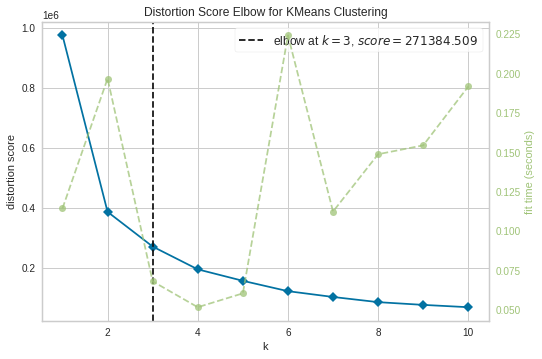

In [9]:
#using Elbow Method to check for best value of k
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(X) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

In [10]:
#implementing Manhattan method in Kmeans from pyclustering.cluster.kmeans library
metric = distance_metric(type_metric.MANHATTAN)
initial_centers = random_center_initializer(X, 3, random_state=5).initialize()
km = kmeans(X, initial_centers=initial_centers, metric=metric)
km.process()
clusters = km.get_clusters()
centers = km.get_centers()

In [11]:
#getting the labels
pyEncoding = km.get_cluster_encoding()
pyEncoder = cluster_encoder(pyEncoding, clusters, X)
labels = pyEncoder.set_encoding(0).get_clusters()
labels[0:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [12]:
#Adding "Labels" column into the dataset
data["Labels"] = labels
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Labels
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1


In [13]:
data.describe()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Labels
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000,0.965000
std,57.879185,0.497633,13.969007,26.264721,25.823522,0.816768
min,1.000000,0.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,0.000000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000,2.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000,2.000000


In [15]:
data['Labels'].value_counts()

0    70
1    67
2    63
Name: Labels, dtype: int64

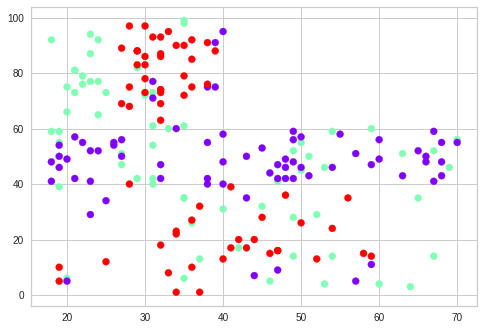

In [16]:
#plotting scatter plot for Age and Spending_Score columns to view clusters
plt.scatter(data['Age'], data['Spending_Score'], c=data['Labels'], cmap='rainbow')

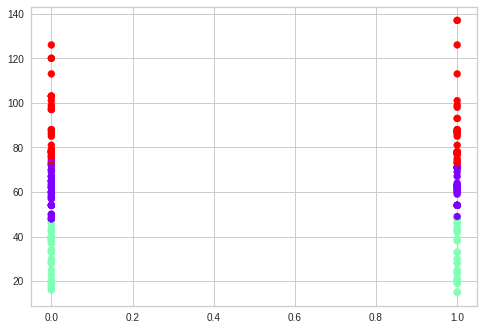

In [17]:
#plotting scatter plot for Genre and Annual_Income_(k$) columns to view clusters
plt.scatter(data['Genre'], data['Annual_Income_(k$)'], c=data['Labels'], cmap='rainbow')

**Performing Classification Tasks**

In [18]:
#Splitting data into X and Y

X=data.drop(columns=['CustomerID','Labels']).values
Y=data['Labels'].values

#scaling features with StandardScaler
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992]])

In [ ]:
#splitting into train and test for our dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 42)

**Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# Evaluating on Training set
logreg_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(Y_test, logreg_pred))

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, logreg_pred)))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.85      1.00      0.92        11
           2       0.93      1.00      0.96        13

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.93        40
weighted avg       0.93      0.93      0.92        40

Model accuracy score: 0.9250


**Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test)

In [ ]:
print(classification_report(Y_test, dt_pred))

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, dt_pred)))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.79      1.00      0.88        11
           2       1.00      0.85      0.92        13

    accuracy                           0.88        40
   macro avg       0.88      0.89      0.88        40
weighted avg       0.89      0.88      0.88        40

Model accuracy score: 0.8750


**Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, Y_train)

# Evaluating on Training set
rfc_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(Y_test, rfc_pred))

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, rfc_pred)))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.79      1.00      0.88        11
           2       1.00      0.85      0.92        13

    accuracy                           0.88        40
   macro avg       0.88      0.89      0.88        40
weighted avg       0.89      0.88      0.88        40

Model accuracy score: 0.8750


**Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, Y_train)

gnb_pred = gnb.predict(X_test)

In [ ]:
print(classification_report(Y_test, gnb_pred))

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, gnb_pred)))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.85      1.00      0.92        11
           2       0.93      1.00      0.96        13

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.93        40
weighted avg       0.93      0.93      0.92        40

Model accuracy score: 0.9250


From the results above, we can see that our best models are the Logistic Regression and Naive Bayes models. The two models had the same scores for precision, recall and accuracy. The Random Forest and Decision Tree models didn't perform badly too, the two models had the same scores for precision, recall and accuracy.
From what we can see from our models, we can conclude that our clusters are making sense. 

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
#Importing the breast_cancer dataset from sklearn.datasets library
b_cancer = datasets.load_breast_cancer()
X = b_cancer.data
y = b_cancer.target
variable_names = b_cancer.feature_names

X[0:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [ ]:
#Performing PCA (2 components) for dataset
pca = PCA(n_components=2)
b_pca = pca.fit_transform(X)

array([0.98204467, 0.01617649])

In [ ]:
#viewing the components of Pca
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.005086,0.002197,0.035076,0.516826,0.000004,0.000041,0.000082,0.000048,0.000007,-0.000003,...,0.007155,0.003067,0.049458,0.852063,0.000006,0.000101,0.000169,0.000074,0.000018,0.000002
1,0.009287,-0.002882,0.062748,0.851824,-0.000015,-0.000003,0.000075,0.000046,-0.000025,-0.000016,...,-0.000569,-0.013215,-0.000186,-0.519742,-0.000077,-0.000256,-0.000175,-0.000031,-0.000157,-0.000055


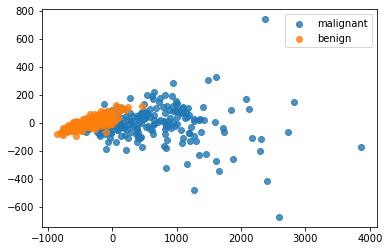

In [ ]:
#visualizing components for PCA with scatterplot
pca = PCA(n_components=2)
data_plot = pca.fit_transform(X)
target_names = b_cancer.target_names
plt.figure()
colors = ['red', 'green']
lw = 1
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, cmap='rainbow',
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display PCA plot
plt.show()

In [ ]:
#Performing LDA (1 component) for dataset
lda = LinearDiscriminantAnalysis(n_components=1)
b_lda = lda.fit(X, y).transform(X)

array([1.])

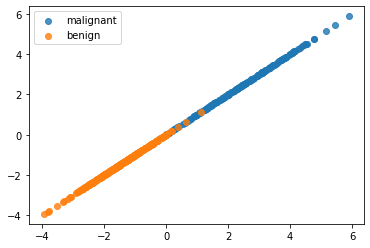

In [ ]:
#visualizing components for LDA with scatterplot
data_plot = lda.fit(X, y).transform(X)
target_names = b_cancer.target_names
plt.figure()
colors = ['red', 'green']
lw = 1
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i], alpha=.8, cmap='rainbow',
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display PCA plot
plt.show()

In [ ]:
#Checking Maximum variance explained by PCA and LDA
print("PCA Maximum Variance Explained: ", pca.explained_variance_ratio_)
print("LDA Maximum Variance Explained: ", lda.explained_variance_ratio_)

PCA Maximum Variance Explained:  [0.98204467 0.01617649]
LDA Maximum Variance Explained:  [1.]


From the explained variance above, we can see that PCA explained 99% of the dataset while LDA explained 100% of the dataset. We can say that LDA is better for the breast_cancer dataset since it explained the whole dataset, we can also see in the plots above that LDA did a better job in segregating the class labels.